# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import json
from pprint import pprint

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object

html = browser.html

soup = BeautifulSoup(html, "html.parser")

In [6]:
# Extract all rows of data

Mars_table_rows = soup.find_all("tr")
print(Mars_table_rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

In [7]:
# Extract all rows of data

Mars_temp_table = soup.find("table", class_="table")

Mars_table_headers = Mars_temp_table.find_all("th")


In [14]:
pprint(Mars_table_headers)

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list

Mars_rows_list = []

# Loop through the scraped data to create a list of rows

for row in Mars_temp_table.find_all('tr')[1:]: 
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    Mars_rows_list.append(row_data)

In [16]:
len(Mars_rows_list)

1867

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

Mars_temp_df = pd.DataFrame(Mars_rows_list, columns=Mars_table_headers)

# Confirm DataFrame was created successfully

Mars_temp_df.head()

,[id],[terrestrial_date],[sol],[ls],[month],[min_temp],[pressure]
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [19]:
Mars_temp_df.columns = ["ID", "Terrestial Date", "Sol", "ls", "Month", "Min Temp", "Pressure"]

Mars_temp_df.head()

,ID,Terrestial Date,Sol,ls,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column

Mars_temp_df.dtypes

ID                 object
Terrestial Date    object
Sol                object
ls                 object
Month              object
Min Temp           object
Pressure           object
dtype: object

In [22]:
# Change data types for data analysis

Mars_temp_df["Terrestial Date"] = pd.to_datetime(Mars_temp_df["Terrestial Date"])

Mars_temp_df['Sol'] = Mars_temp_df['Sol'].astype(int)
Mars_temp_df['ls'] = Mars_temp_df['ls'].astype(int)
Mars_temp_df['Month'] = Mars_temp_df['Month'].astype(int)
Mars_temp_df['Min Temp'] = Mars_temp_df['Min Temp'].astype(float)
Mars_temp_df['Pressure'] = Mars_temp_df['Pressure'].astype(float)

In [23]:
Mars_temp_df.dtypes

ID                         object
Terrestial Date    datetime64[ns]
Sol                         int64
ls                          int64
Month                       int64
Min Temp                  float64
Pressure                  float64
dtype: object

In [ ]:
# Change integer data types to int32

Mars_temp_df['Sol'] = Mars_temp_df['Sol'].astype('int32')
Mars_temp_df['ls'] = Mars_temp_df['ls'].astype('int32')
Mars_temp_df['Month'] = Mars_temp_df['Month'].astype('int32')

In [ ]:
# Confirm type changes were successful by examining data types again

Mars_temp_df.dtypes

ID                         object
Terrestial Date    datetime64[ns]
Sol                         int32
ls                          int32
Month                       int32
Min Temp                  float64
Pressure                  float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [52]:
# 1. How many months are there on Mars?

number_of_Mars_months = Mars_temp_df['Month'].nunique()

print(f"There are {number_of_Mars_months} months on Mars.")


There are 12 months on Mars.


In [53]:
# 2. How many sols (Martian days) worth of data are there?

Mars_sols = Mars_temp_df['Sol'].nunique()

print(f"There are {Mars_sols} Martian sols worth of data.")

There are 1867 Martian sols worth of data.


In [54]:
# 3. What is the average minimum temperature by month?

average_min_temp_by_month = Mars_temp_df.groupby('Month')['Min Temp'].mean()

print(f"The average minimum temperature by month is: {average_min_temp_by_month}")

The average minimum temperature by month is: Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp, dtype: float64


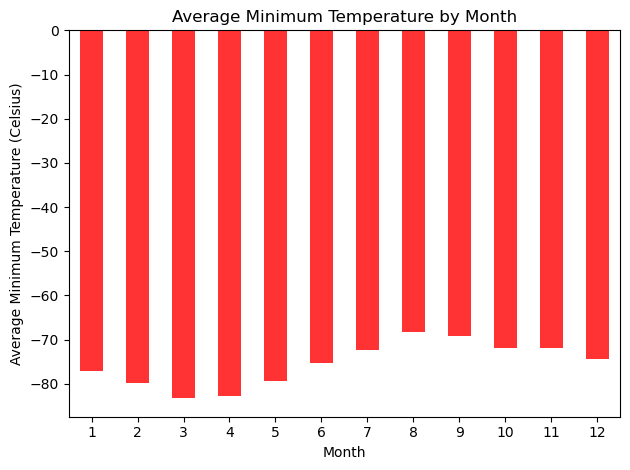

In [55]:
# Plot the average minimum temperature by month

average_min_temp_by_month.plot(kind='bar', color='red', alpha=0.8, align="center") 
plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (Celsius)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

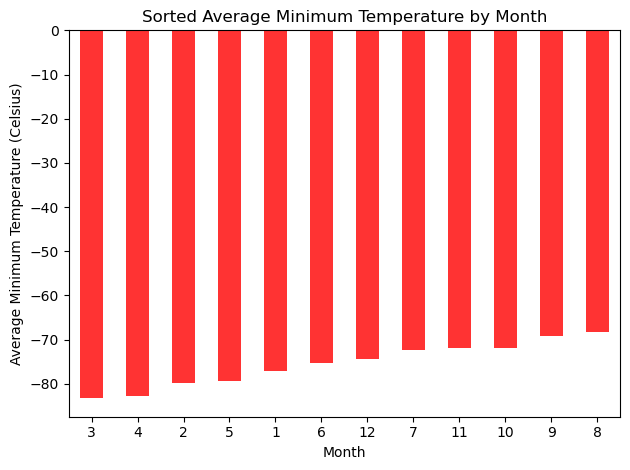

In [56]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_average_min_temp_by_month = average_min_temp_by_month.sort_values()
sorted_average_min_temp_by_month.plot(kind='bar', color='red', alpha=0.8, align="center")
plt.title("Sorted Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (Celsius)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
# 4. What is the average pressure by month?

average_pressure_by_month = Mars_temp_df.groupby('Month')['Pressure'].mean()

print(f"The average pressure by month is{average_pressure_by_month}")


The average pressure by month isMonth
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64


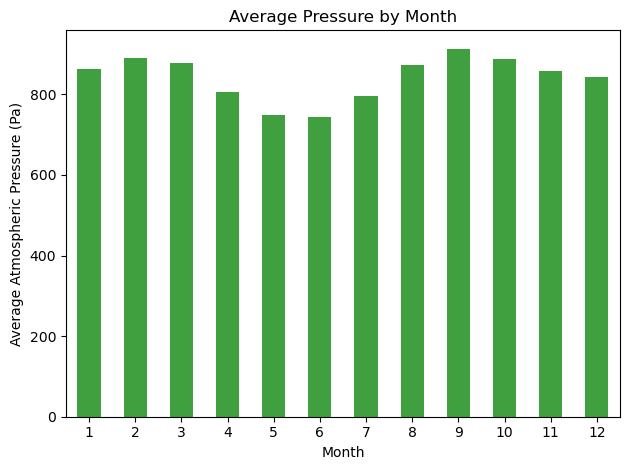

In [58]:
# Plot the average pressure by month

average_pressure_by_month.plot(kind='bar', color='green', alpha=0.75, align="center")
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

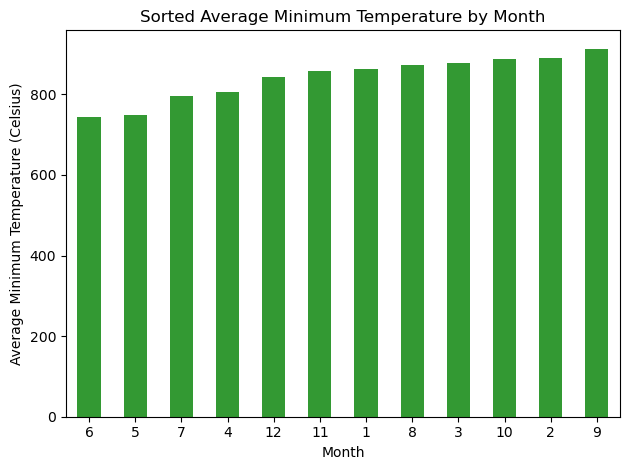

In [59]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

sorted_average_pressure_by_month = average_pressure_by_month.sort_values()
sorted_average_pressure_by_month.plot(kind='bar', color='green', alpha=0.8, align="center")
plt.title("Sorted Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (Celsius)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

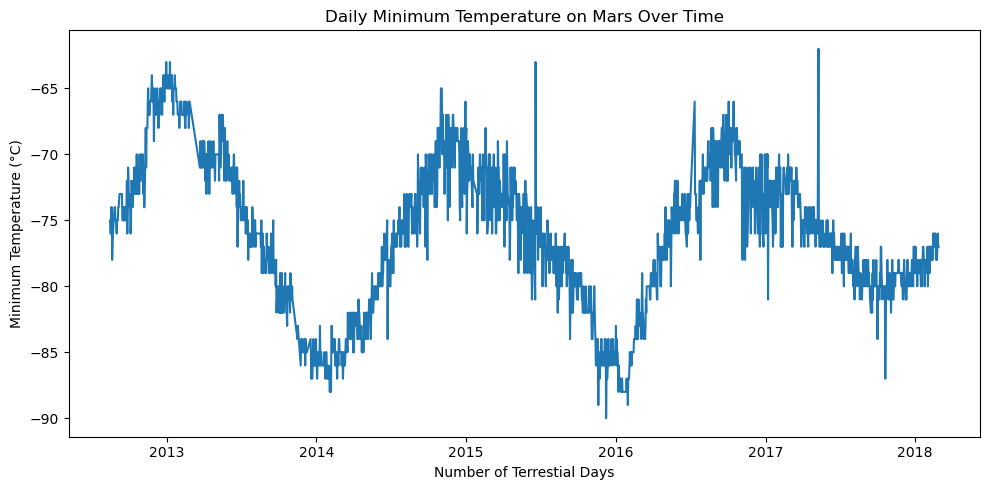

In [60]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(10, 5))
plt.plot(Mars_temp_df["Terrestial Date"], Mars_temp_df["Min Temp"])
plt.xlabel("Number of Terrestial Days")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars Over Time")
plt.tight_layout()
plt.show()

# Wrong result to visually estimate the number of terrestrial days in a Martian year***


In [61]:
# Create a new column to calculate the number of days since the start of the data set  

Mars_temp_df["Days since Data Start"] = (Mars_temp_df["Terrestial Date"] - Mars_temp_df["Terrestial Date"].min()).dt.days

Mars_temp_df.head()



,ID,Terrestial Date,Sol,ls,Month,Min Temp,Pressure,Days since Data Start
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4


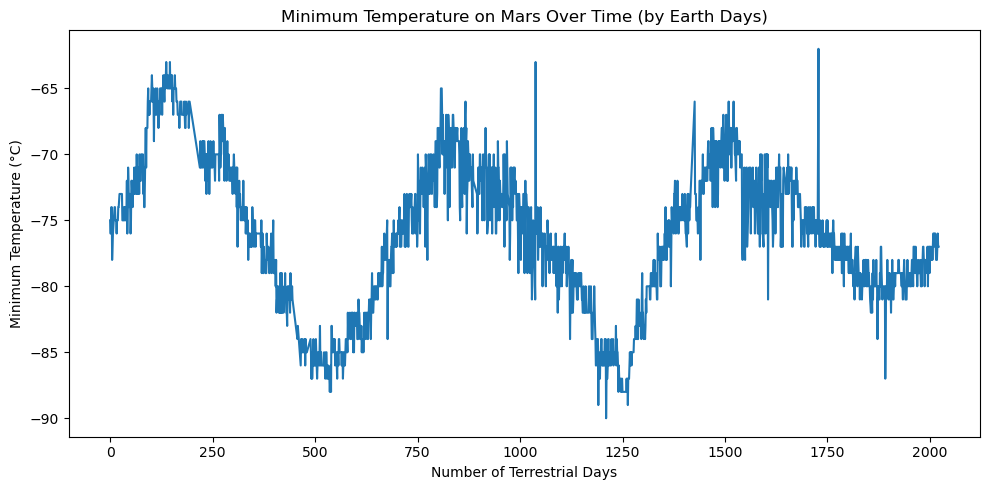

In [62]:
# Create a new Plot using the new column to visually estimate the number of terrestrial days in a Martian year.

plt.figure(figsize=(10, 5))
plt.plot(Mars_temp_df["Days since Data Start"], Mars_temp_df["Min Temp"])
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature on Mars Over Time (by Earth Days)")
plt.tight_layout()
plt.show()


#### Result

Visual analysis of the plot suggests that there are approximately 700 terrestrial days in a Martian year.

A quick online search confirms a Martian year equals 1.88 Earth years or 687 Earth days, aligning closely with our initial visual analysis.

#### Minimum Temperature

Based on the data, the coldest average minimum temperature (Month 3) is around -83°C while the highest (Month 9) is around -67°C. Despite being the "warmest" month, the red planet is extremely cold year-round with all temperatures well below freezing. The variation and graphs also show a smooth wave-like pattern, depicting clear seasonal cycles. 

Though far colder, our analysis confirms Mars has different seasons driven by its tilt and orbit. In a similar vein, these results also add a degree of predictability when it comes to climate cycles at the rover's location. This information is critical for mission planning as well as future habitat and rover/vehicle designs as well as energy usage and plans for colonization of the red planet.

#### Atmospheric Pressure

Imfluenced by Martian seasons, atmospheric pressure varies in a cyclical pattern. After further research and analysis, its revealed there is a variaton of over 150 Pa, which is significant for a planet with such a thin atmosphere (less than 1% of Earth's). The bar chart also supports this cyclical pattern, matching the planet's climate response to seasonal CO2 cycling between the atmosphere and the polar ice caps. 

Our analysis aligns with findings from previous missions and reflect what's been deemed the "seasonal breathing" of the Martian atmosphere.

#### Year Length

To estimate the length of a Martian year, we analyzed the daily temperatures recorded by the Curiosity rover and plotted them against the Earth days elapsed since the beginning of the data set. The wave-like pattern makes it easy to identify similar points in the cycle and calculate its length. 

A Martian year is approximately 1.88 Earth years or 687 Earth days long. Bringing all this data together with pressure and temperature variations helps agencies understand the big picture of what is happening in the red planet. All of this information is crucial for mission timing and planning (Mars gives us a small window every 2 Earth years to achive the most efficient trajectory using existing technology), solar energy planning as well as long-term climate modeling and habitat design for future exploration efforts.

The data(and footage) collected by rovers such as Curiosity and Perseverence not only captivated scientists and the general public alike, it has opened the possibilites like never before for the human race to achieve its next frontier, becoming a multi-planetary species.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV

Mars_temp_df.to_csv("Mars_Temperature_Data.csv", index=False)

In [64]:
browser.quit()